In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [7]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [8]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


 #Linear Regression Formoul 
 $$y(y, x) = w_0 + w_1 x_1 + w_1 x_1 + w_2 x_2 + \cdots + w_P x_p$$

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [11]:
data.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [14]:
data = data.drop(columns=['Serial No.'])

In [15]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [16]:
data.describe()  #برای دیدن اسکیل هر فیچر

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
#همنطور که دیده می شود اسکیل ها یکسان نیستند و در فرآیند رگرشن دچار مشگل خواهیم شد

In [ ]:
#پس باید داده ها را اسکیل بکنیم

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #میخواهیم مینیمم را روی صفر و مکزیمم را روی 1 قرار دهیم

In [21]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [23]:
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

In [24]:
X #حلا روی این ایکسس که داریم اسکیلینگ می زنیم

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [26]:
MinMaxScaler().fit_transform(X) #پیش فرض داخا پرانتز خود مینیمم و مکزیمم صفر و یک هست

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 1.        , 1.        , ..., 1.        , 0.88461538,
        1.        ],
       [0.44      , 0.39285714, 0.75      , ..., 1.        , 0.5224359 ,
        0.        ],
       [0.74      , 0.75      , 0.75      , ..., 0.875     , 0.71794872,
        0.        ]])

In [27]:
X_Scaled = MinMaxScaler().fit_transform(X)

In [28]:
X_Scaled

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 1.        , 1.        , ..., 1.        , 0.88461538,
        1.        ],
       [0.44      , 0.39285714, 0.75      , ..., 1.        , 0.5224359 ,
        0.        ],
       [0.74      , 0.75      , 0.75      , ..., 0.875     , 0.71794872,
        0.        ]])

In [29]:
X_Scaled.shape

(500, 7)

In [30]:
X_Scaled[:, -1] #تمام ردیف ها و ستون آخرش

array([1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [37]:
X_train, X_test, y_train, y_test 

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 238        310          104                  3  2.0   3.5  8.37         0
 438        318          110                  1  2.5   3.5  8.54         1
 475        300          101                  3  3.5   2.5  7.88         0
 58         300           99                  1  3.0   2.0  6.80         1
 380        322          104                  3  3.5   4.0  8.84         1
 ..         ...          ...                ...  ...   ...   ...       ...
 255        307          110                  4  4.0   4.5  8.37         0
 72         321          111                  5  5.0   5.0  9.45         1
 396        325          107                  3  3.0   3.5  9.11         1
 235        326          111                  5  4.5   4.0  9.23         1
 37         300          105                  1  1.0   2.0  7.80         0
 
 [400 rows x 7 columns],
      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Researc

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((400, 7), (100, 7), (400,), (100,))

In [39]:
from sklearn.linear_model import LinearRegression

#Simple Linear Regression
$$\min_{w}\|Xw-y\|_2^2$$

lr = LinearRegression()
lr.fit(X_train, y_train)

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
lr.coef_

array([0.00183224, 0.00317393, 0.00612886, 0.00300508, 0.01442681,
       0.11670429, 0.01988978])

In [46]:
lr.coef_.shape #7 تا ضریب داریم

(7,)

In [48]:
lr.coef_.shape, lr.intercept_ #یک عدد عرض از مبدا

((7,), -1.2887254963489017)

In [49]:
lr.predict(X_test)

array([0.65364463, 0.70043542, 0.94400884, 0.73135825, 0.81719181,
       0.66513709, 0.74546219, 0.71398256, 0.78873127, 0.65653766,
       0.66883172, 0.56215153, 0.78221604, 0.79560121, 0.77166888,
       0.85777014, 0.62918292, 0.76196454, 0.89748589, 0.67181012,
       0.62843768, 0.79390017, 0.84201562, 0.59214465, 0.78876323,
       0.5688167 , 0.95161786, 0.64436779, 0.86027013, 0.71082762,
       0.63334096, 0.81502112, 0.59773752, 0.91046031, 0.5079117 ,
       0.81814977, 0.68720131, 0.63320441, 0.65956114, 0.91169813,
       0.56572719, 0.66078745, 0.77234455, 0.97095744, 0.77180606,
       0.52235571, 0.66698457, 0.63029872, 0.65362771, 0.66061792,
       0.83352993, 0.91851356, 0.87827235, 0.61929821, 0.76833342,
       0.64295764, 0.74767251, 0.60334621, 0.6594083 , 0.69646847,
       0.4376351 , 0.72186637, 0.75307031, 0.84912984, 0.98015564,
       0.61054881, 0.73186256, 0.77395027, 0.94143227, 0.70255514,
       0.60282575, 0.65413563, 0.82416213, 0.49104946, 0.92578

In [50]:
y_pred_lr = lr.predict(X_test)

In [51]:
y_test

304    0.62
340    0.75
47     0.89
67     0.57
479    0.79
       ... 
11     0.84
192    0.86
92     0.34
221    0.75
110    0.61
Name: Chance of Admit , Length: 100, dtype: float64

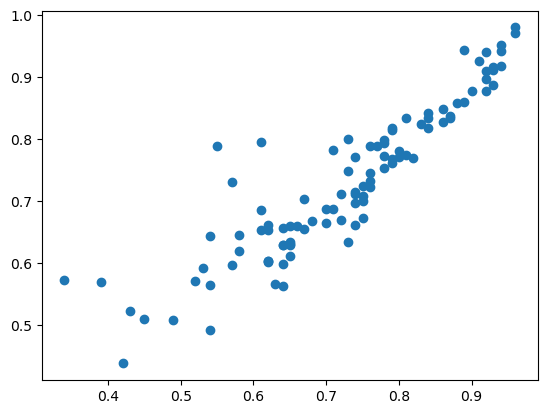

In [52]:
plt.scatter(y_test, y_pred_lr)

In [59]:
import matplotlib.pyplot as plt

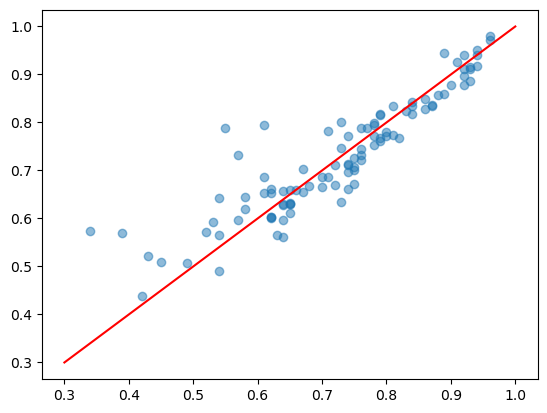

In [63]:
plt.plot(np.linspace(0.3, 1, 100), np.linspace(0.3, 1, 100), c='r')
plt.scatter(y_test, y_pred_lr, alpha=0.5)

#Ridg Model
$$\min_{w}\|Xw-y\|_2^2 + \alpha \|w\|_2^2$$

In [ ]:
#عبارت اضافه شده آلفا برای جلوگیری از اوور فیتینگ هست یعنی مدل مان بیش از حد روی داده هلمون فیت نشه و همچنین نویز هایی که روی داده هایمان را دارد را یاد نگیرد 

In [64]:
from sklearn.linear_model import Ridge

In [65]:
ridge = Ridge(alpha=1)#آلفا میتواند هر عددی باشد ولی هر چه قدر بزرگتر باشر اثر آلفا بیشتر میشود و بیشتر وزن ها را سمت صفر میبرد
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [66]:
ridge.coef_, ridge.intercept_

(array([0.0019147 , 0.00326013, 0.00631515, 0.00335934, 0.01464692,
        0.11312152, 0.01968459]),
 -1.2957538843043312)

In [67]:
y_pred_ridge = ridge.predict(X_test)

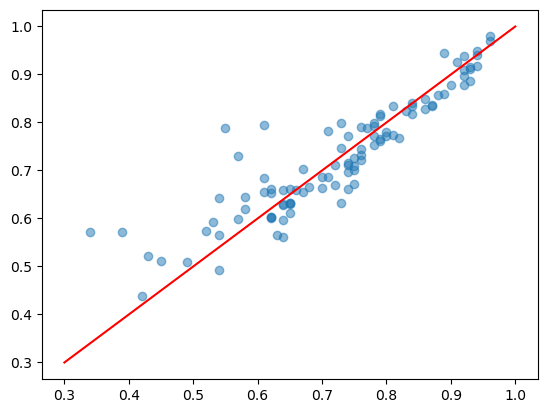

In [68]:
plt.plot(np.linspace(0.3, 1, 100), np.linspace(0.3, 1, 100), c='r')
plt.scatter(y_test, y_pred_ridge, alpha=0.5)

#Lasso Model
$$\min_{w}\frac{1}{2n_Samples}\|Xw-y\|_2^2 + \alpha \|w\|_1$$

In [69]:
from sklearn.linear_model import Lasso

In [71]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [72]:
lasso.coef_

array([0.00244109, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [73]:
lasso.intercept_

-0.050782916492928876

In [74]:
y_pred_lasso = lasso.predict(X_test)

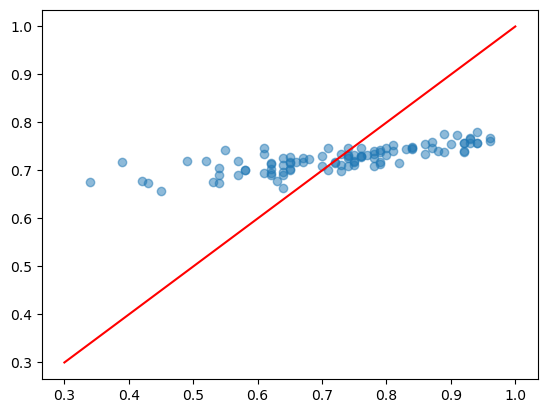

In [75]:
plt.plot(np.linspace(0.3, 1, 100), np.linspace(0.3, 1, 100), c='r')
plt.scatter(y_test, y_pred_lasso, alpha=0.5)

#Elastic-Net Model :
$$\min_{w}\frac{1}{2n_Samples}\|Xw-y\|_2^2 + \alpha \rho \|w\|_1 + \frac{\alpha (1-\rho)}{2} \|w\|_2^2$$

In [76]:
from sklearn.linear_model import ElasticNet

In [77]:
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=1)

In [78]:
elastic_net.coef_

array([0.00625614, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [79]:
elastic_net.intercept_


-1.256844289314604

In [80]:
y_pred_elastic_net = elastic_net.predict(X_test)

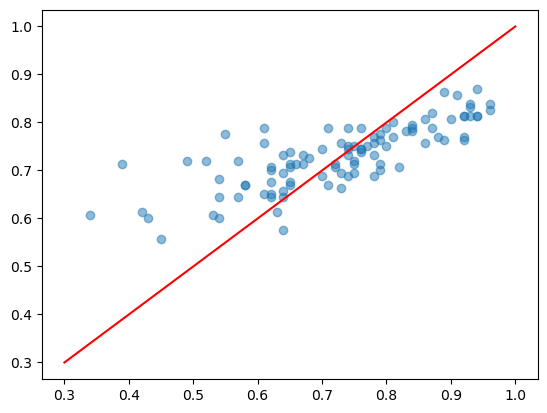

In [81]:
plt.plot(np.linspace(0.3, 1, 100), np.linspace(0.3, 1, 100), c='r')
plt.scatter(y_test, y_pred_elastic_net, alpha=0.5)

# Polinominal Featuers :
$$y(y, x) = w_0 + w_1 x_1 + w_1 x_1 + w_2 x_2 + \cdots + w_P x_p + w_{p+1} x_1 x_2 + \cdots w_{i} x_1^2 + \cdots$$

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [85]:
reg1 = Pipeline(steps=[('Poly featuers', PolynomialFeatures(degree=2, interaction_only=False)), ('regression',
                      LinearRegression())])

reg1.fit(X_train, y_train)

Pipeline(steps=[('Poly featuers', PolynomialFeatures()),
                ('regression', LinearRegression())])

In [86]:
y_pred_reg1 = reg1.predict(X_test)

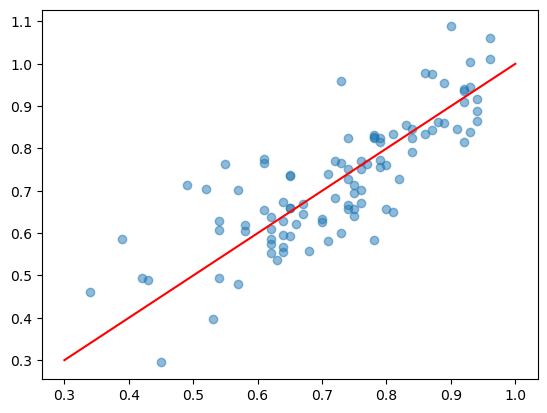

In [87]:
plt.plot(np.linspace(0.3, 1, 100), np.linspace(0.3, 1, 100), c='r')##در نقاقط بالای نمودار سمت راست مشاهده می شود که بیشتر لز 1 شده است که کار خراب شده
plt.scatter(y_test, y_pred_reg1, alpha=0.5)

In [88]:
reg2 = Pipeline(steps=[('Poly featuers', PolynomialFeatures(degree=2, interaction_only=True)), ('regression',
                      LinearRegression())])

reg2.fit(X_train, y_train)

Pipeline(steps=[('Poly featuers', PolynomialFeatures(interaction_only=True)),
                ('regression', LinearRegression())])

In [90]:
y_pred_reg2 = reg2.predict(X_test)

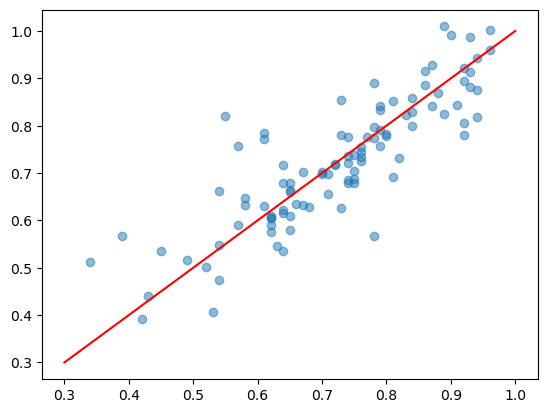

In [91]:
plt.plot(np.linspace(0.3, 1, 100), np.linspace(0.3, 1, 100), c='r') 
plt.scatter(y_test, y_pred_reg2, alpha=0.5)

In [92]:
reg2 = Pipeline(steps=[('Poly featuers', PolynomialFeatures(degree=3, interaction_only=True)), ('regression',
                      LinearRegression())]) #درجه را میبریم بالا

reg2.fit(X_train, y_train)

Pipeline(steps=[('Poly featuers',
                 PolynomialFeatures(degree=3, interaction_only=True)),
                ('regression', LinearRegression())])

In [93]:
y_pred_reg2 = reg2.predict(X_test)

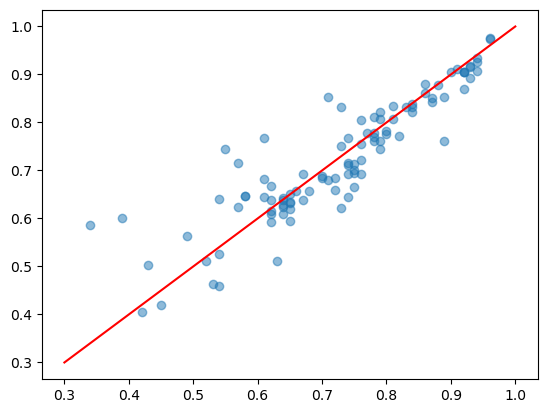

In [94]:
plt.plot(np.linspace(0.3, 1, 100), np.linspace(0.3, 1, 100), c='r') # اوضاع خیلی بهتر شد
plt.scatter(y_test, y_pred_reg2, alpha=0.5)

# Metrics :
$$MaxError(y, \hat{y}) = \max(|y_i - \hat{y}_i|$$

$$MAE(y, \hat{y}) = \frac{1}{n_samples} \sum_{i=1}^{{n_samples}}|y_i - \hat{y}_i|$$

$$MSE(y, \hat{y}) = \frac{1}{n_samples} \sum_{i=1}^{{n_samples}}(y_i - \hat{y}_i)^2$$

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{{n_samples}}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{{n_samples}}(y_i - \bar{y}_i)^2}$$

In [95]:
from sklearn.metrics import max_error, r2_score, mean_absolute_error, mean_squared_error

In [98]:
print(max_error(y_true = y_test, y_pred = y_pred_reg1))
print(r2_score(y_true = y_test, y_pred = y_pred_reg1))
print(mean_absolute_error(y_true = y_test, y_pred = y_pred_reg1))
print(mean_squared_error(y_true = y_test, y_pred = y_pred_reg1))

0.22886492729187013
0.5950072083635043
0.06954954748153687
0.007820815799292368


In [99]:
print(max_error(y_true = y_test, y_pred = y_pred_reg2))
print(r2_score(y_true = y_test, y_pred = y_pred_reg2))
print(mean_absolute_error(y_true = y_test, y_pred = y_pred_reg2))
print(mean_squared_error(y_true = y_test, y_pred = y_pred_reg2))

0.24722402330388943
0.7997136763898796
0.04158326537334988
0.003867729195235035
